Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')



Warning message:
“Failed to locate timezone database”
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [34]:
diabetes_train |> glimpse()
diabetes_train |> head()



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 10, 4, 10, 1, 3, 8, 13, 5, 6, 10, 4, 11…
$ Glucose                  <dbl> 85, 89, 115, 110, 139, 103, 126, 99, 145, 117…
$ BloodPressure            <dbl> 66, 66, 0, 92, 80, 30, 88, 84, 82, 92, 92, 78…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 38, 41, 0, 19, 0, 0, 31, 33,…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 83, 235, 0, 110, 0, 0, 0, 192…
$ BMI                      <dbl> 26.6, 28.1, 35.3, 37.6, 27.1, 43.3, 39.3, 35.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.134, 0.191, 1.441, 0.183, 0.7…
$ Age                      <dbl> 31, 21, 29, 30, 57, 33, 27, 50, 57, 38, 28, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,85,66,29,0,26.6,0.351,31,0
1,89,66,23,94,28.1,0.167,21,0
10,115,0,0,0,35.3,0.134,29,0
4,110,92,0,0,37.6,0.191,30,0
10,139,80,0,0,27.1,1.441,57,0
1,103,30,38,83,43.3,0.183,33,0


❓ Which variable is suitable as the "outcome" in a linear regression model?

**Answer:**

## Age

❓ Navigate to [Kaggle page]() for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

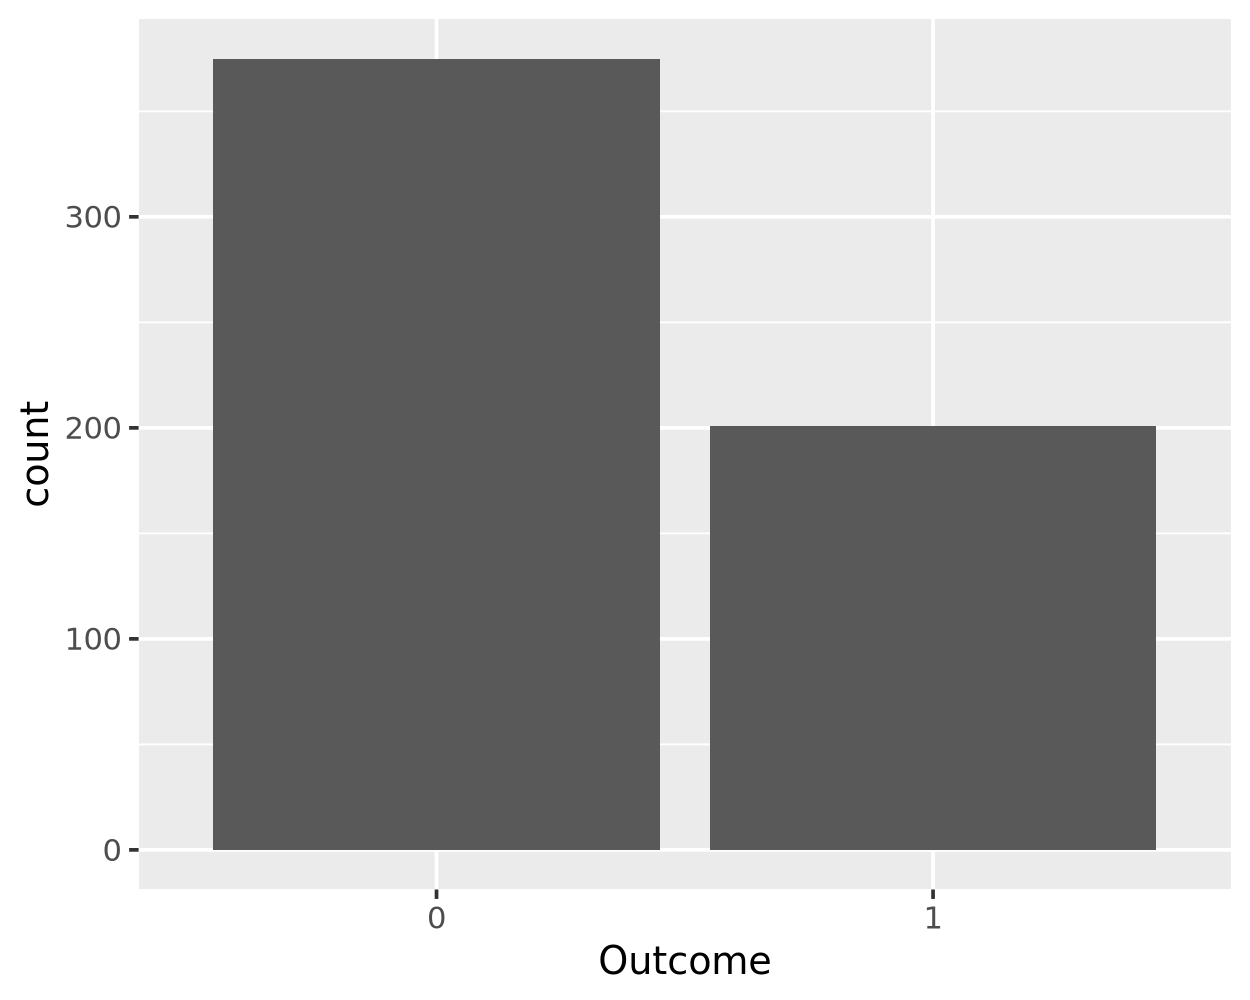

In [10]:
ggplot(diabetes_train, aes(x = Outcome)) +
geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

## The data is not balanced 



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [11]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

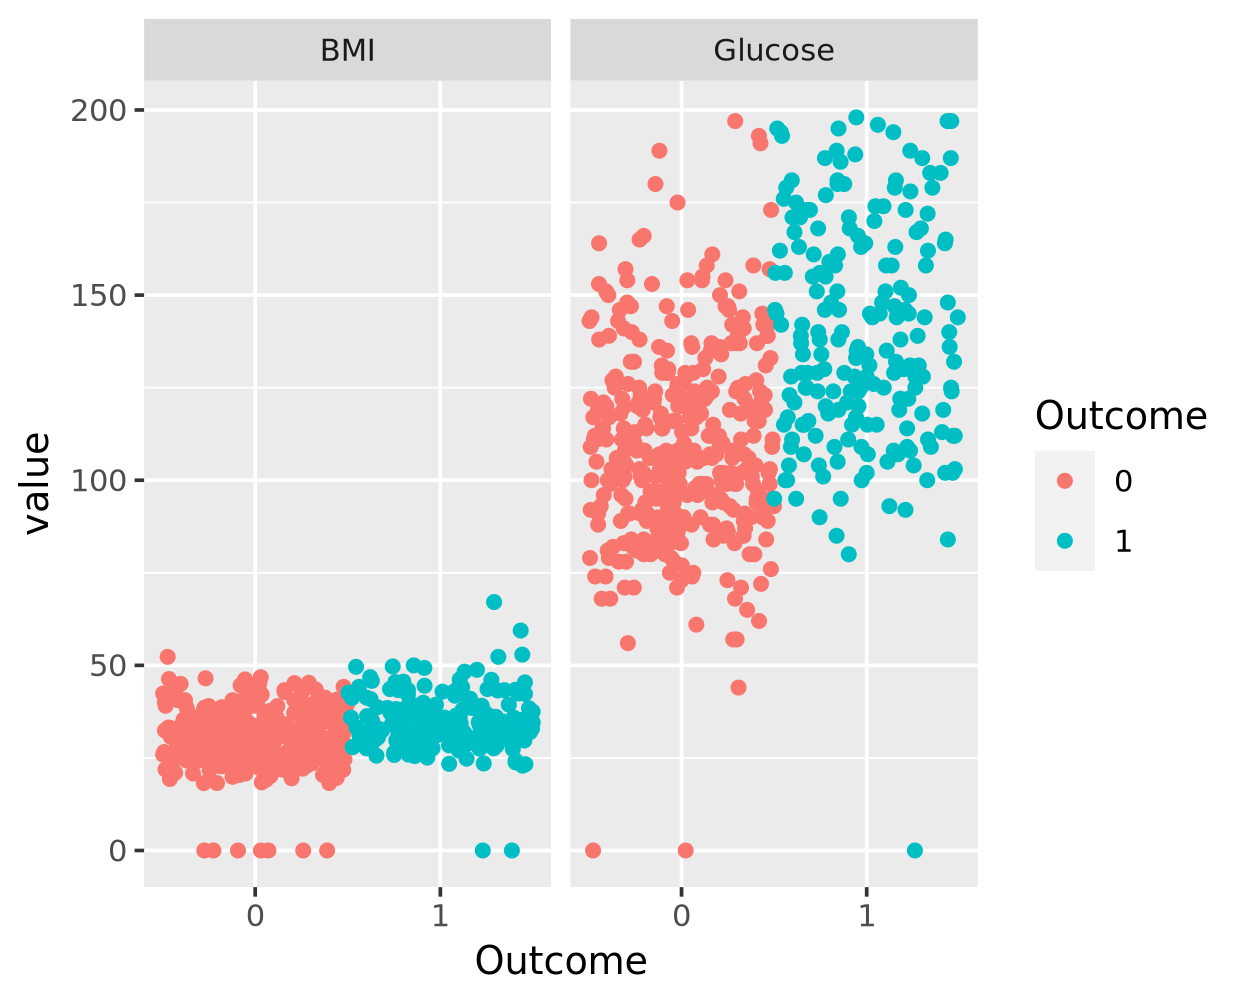

In [33]:
ggplot(plot_df, aes(x=Outcome, y=value, color=Outcome)) + 
geom_jitter(width = 0.5, height = 0) + 
facet_wrap(~name, ncol = 2, scales = 'free_x')



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

## It affects how the axes are scaled across the facets of the plot. Without this argument, the x-axis scale would be consistant across both of the plots

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [35]:
mod <- logistic_reg() |> set_engine('glm')

mod_fit <- mod |> fit(Outcome ~ BMI + Glucose, data=diabetes_train)

tidy(mod_fit)



term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.32853305,0.698510814,-10.491653,9.436291e-26
BMI,0.06921479,0.015210986,4.550316,5.356543e-06
Glucose,0.03585821,0.003893928,9.208750,3.299432e-20


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabeted_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [36]:
diabetes_test_wPred <- augment(mod_fit, diabetes_test) 
diabetes_test_wPred |> head()


.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.36188323,0.63811677,0,137,40,35,168,43.1,2.288,33,1
0,0.80172038,0.19827962,5,116,74,0,0,25.6,0.201,30,0
0,0.91574838,0.08425162,3,78,50,32,88,31.0,0.248,26,1
1,0.13627423,0.86372577,2,197,70,45,543,30.5,0.158,53,1
1,0.07911552,0.92088448,7,196,90,0,0,39.8,0.451,41,1
1,0.41764393,0.58235607,11,143,94,33,146,36.6,0.254,51,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [37]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 110  25
         1  15  42

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

1. 67 people had diabetes
2. 42 people were predicted to have diabetes taht actually had diabetes
3. 15 people were predicted to have diabetes but did not acually have it